进行绘图所需的模块引入

In [1]:
%matplotlib ipympl

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go

下面从项目中的Data文件夹读取相应的数据

In [3]:
location_path='D:\coding\AcousticSensing\Data\Cube\sensor_location.txt'
waveform_path=r'D:\coding\AcousticSensing\Data\Cube\cube_waveform'

# waveform=scipy.io.loadmat(waveform_path)
# print(waveform.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'active','dt','wfm_active'])

# waveform=scipy.io.loadmat(waveform_path)['dt']
# print(waveform)
# 200

waveform=scipy.io.loadmat(waveform_path)['wfm_active']
waveform=waveform.swapaxes(0,2)
[source,receiver,frame]=waveform.shape
print('waveform.shape')
print(waveform.shape)
# we confirm that the shape of waveform is 24*24*2048,the first dimension means the source,the second dimension means the receiver,the third dimension means the frame


# then we will load the location of the sensor
Location_pre=pd.read_table(location_path, sep=' ').values
Location=[]
for i in range(24):
    Location.append([Location_pre[i][1],Location_pre[i][2],Location_pre[i][3]])
    
Location=np.array(Location)
print('Location')
print(Location)

waveform.shape
(24, 24, 2048)
Location
[[49.784   2.667  61.2648]
 [49.9872  2.413  31.5722]
 [24.6634  2.6924 60.8838]
 [24.9682  2.5146 30.9626]
 [ 2.4638 24.8666 60.4774]
 [ 2.4892 25.4762 30.1752]
 [ 2.7178 49.8856 60.6806]
 [ 2.5146 50.5714 30.2768]
 [24.8666 73.66   60.6806]
 [25.273  73.8124 30.1752]
 [50.673  73.6346 60.579 ]
 [50.5714 73.8378 30.1752]
 [73.6346 50.673  60.579 ]
 [73.66   50.673  30.2768]
 [73.66   25.4762 61.087 ]
 [73.6092 25.0698 30.2768]
 [25.5778 50.673   2.3876]
 [25.5778 25.1714  2.4892]
 [50.673  50.0634  2.6416]
 [50.7746 24.9682  2.3114]
 [25.4762 25.6286 88.9   ]
 [50.9778 50.673  88.6968]
 [50.8762 25.3746 89.1032]
 [25.5778 50.9778 89.0016]]


下面我们将进行一些简单的作图，首先是将active的waveform数据进行画出

In [4]:
# 这里我们创建source个folder，用于存储每个source传播时reciever的数据图像
path=r'D:\coding\AcousticSensing\Draw\cube\waveform_pic'
for i in range(source):
    os.mkdir(path+'\\'+str(i+1))

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\coding\\AcousticSensing\\Draw\\cube\\waveform_pic\\1'

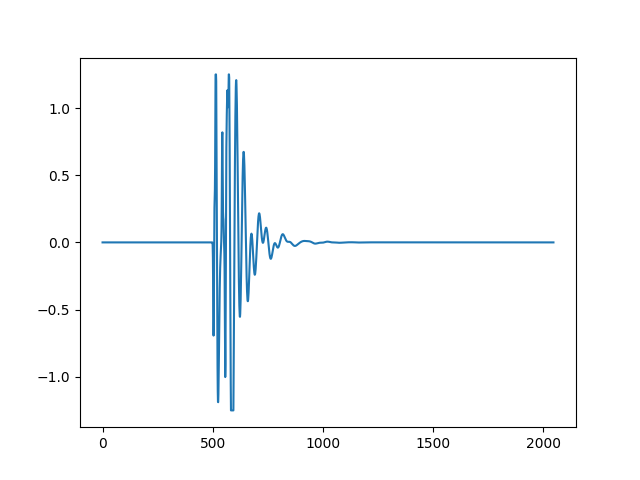

In [4]:
waveform_reserve_path='D:\coding\AcousticSensing\Draw\cube\waveform_pic'
# for i in range(source):
#     for j in range(receiver):
#         plt.figure(figsize=(20,8))
#         plt.plot(range(frame),waveform[i][j])
#         plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
#         plt.close()
    
plt.close()
# under used to show
plt.figure()
plt.plot(range(frame),waveform[0][0])



plt.show()

下面将作图以展现sensor的位置，从而实现我们数据的获取来源

In [6]:
# first we record the parameter of the cube
# length=71.0
# width=71.0
length=76.2
width=76.2
height=91.4

In [7]:
# then we use plotly to draw the cube and the sensor,and we use the red color to show the sensor and then 
fig = go.Figure(data=[
    go.Scatter3d(
        x=Location[:,0],
        y=Location[:,1],
        z=Location[:,2],
        mode='markers',
        marker=dict(
            symbol='circle',
            size=4,
            color='red',                # set color to an array/list of desired values
            opacity=0.4
        )
    )
])

place_to_paint=np.array(Location).swapaxes(0,1)
annotations = []
for i in range(24):
    annotations.append(dict(x=place_to_paint[0][i], y=place_to_paint[1][i], z=place_to_paint[2][i],
                            text='ch{}'.format(i+1),
                            showarrow=False,
                            font=dict(color='black')))

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),scene_annotations=annotations)
# fig.write_image("3d_plot.svg")
fig.show()

下面画展开图标明位置

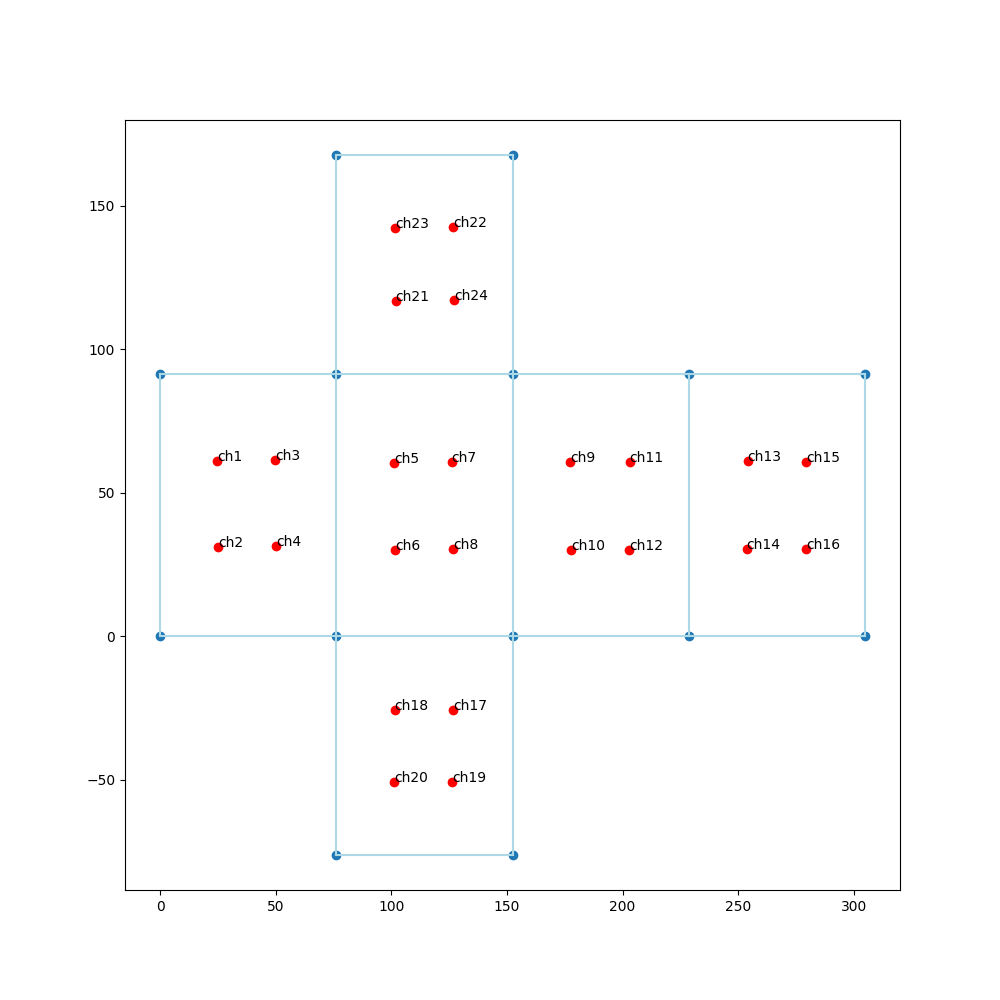

In [8]:
# 下面我们要将这个方块展开，然后画出展开的图片和传感器的位置
# 首先，我们画出立方体展开成平面图的样子

# cross_point_x=[0,0,71.0,71.0,142.0,142.0,213.0,213.0,284.0,284.0,71.0,142.0,71.0,142.0]
# cross_point_y=[0,91.4,0,91.4,0,91.4,0,91.4,0,91.4,162.4,162.4,-71.0,-71.0]
cross_point_x=[0,0,length,length,length+width,length+width,length+width+length,length+width+length,length+width+length+width,length+width+length+width,length,length+width,length,length+width]
cross_point_y=[0,height,0,height,0,height,0,height,0,height,height+length,height+length,-length,-length]
link_order=[[0,1],[0,2],[1,3],[2,3],[2,4],[3,5],[4,5],[4,6],[5,7],[6,7],[6,8],[7,9],[8,9],[10,3],[10,11],[11,5],[12,2],[12,13],[13,4]]
# 下面画出这些点
plt.figure(figsize=(10,10))
plt.scatter(cross_point_x,cross_point_y)
# 下面我们连接这些点
for link in link_order:
    plt.plot([cross_point_x[link[0]],cross_point_x[link[1]]],[cross_point_y[link[0]],cross_point_y[link[1]]],color='lightblue')
    
# 下面我们画出传感器的位置
sensor_place_2d=[]
text=[]
for i in range(source):
    if(Location[i][1]<3):
        sensor_place_2d.append([Location[i][0],Location[i][2]])
        if(i<=1):
            text.append('ch{}'.format(i+3))
        else:
            text.append('ch{}'.format(i-1))
    if(Location[i][0]<3):
        sensor_place_2d.append([Location[i][1]+length,Location[i][2]])
        text.append('ch{}'.format(i+1))
    if(Location[i][1]>73):
        sensor_place_2d.append([Location[i][0]+length+width,Location[i][2]])
        text.append('ch{}'.format(i+1))
    if(Location[i][0]>73):
        sensor_place_2d.append([Location[i][1]+length*2+width,Location[i][2]])
        if(i<=13):
            text.append('ch{}'.format(i+3))
        else:
            text.append('ch{}'.format(i-1))
    if(Location[i][2]<3):
        sensor_place_2d.append([Location[i][1]+length,-Location[i][0]])
        text.append('ch{}'.format(i+1))
    if(Location[i][2]>88):
        sensor_place_2d.append([Location[i][1]+length,Location[i][0]+height])
        text.append('ch{}'.format(i+1))
        
sensor_place_2d=np.array(sensor_place_2d).swapaxes(0,1)
plt.scatter(sensor_place_2d[0],sensor_place_2d[1],color='red')
# 下面我们将传感器的编号写上去
for i in range(len(text)):
    plt.annotate(text[i],(sensor_place_2d[0][i],sensor_place_2d[1][i]))



# 下面我们将这个图保存下来
plt.savefig('D:\coding\AcousticSensing\Draw\cube\cube_expend.png')
    
    
plt.show()

下面我们需要phasenet去判定到时，然后我们将到时的结果进行展示